# Lab 2:  Problem 2

In [95]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
import sympy as sym
"""for pen plotting"""
# Initialiserer pen visning av uttrykkene
sym.init_printing()

# Plotteparametre for C% fC% store, tydelige plott som utnytter tilgjengelig skjermareal
fontsize = 20
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (16, 7), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.5}
plt.rcParams.update(newparams)

We want to solve the fixed point system $x = f(x)$ where $f(x) = \cos(0.5\pi x)+1$, using a fixed point iteration. Verify that $x=1$ is a solution to this fixed point system. 

**a)** Explain (with less than three sentences) why $[0,2]$ is a natural choice of a domain for a fixed point iteration for solving $x = f(x)$. 

<font color='blue'>
    
   Solution: 

</font>

Since $$-1 \leq cos(y) \leq 1 \Rightarrow 0 \leq cos(y) + 1 \leq 2 \Rightarrow f([0,2]) \rightarrow [0,2]$$
$[0,2]$ is a natrual choiche of a domain for a fixed point iteration for solving $x=f(x)$.

**b)** Fixed point iterations. Write a function which runs a fixed point iteration for $f$ and returns the sequence of iterations $[x_0, x_1, x_2, \ldots, x_n]$. Using initial point $x_0 = 0.1$, plot the evolution of the error as a function of the number of iterations. Does the iteration seem to converge?

In [98]:
# In python you can create functions using the lambda function.
# For example: with the following decleration, f is now a function for which f(x) evaluates sin(x)
# f = lambda x: np.sin(x)


def banach_fp(f, x0, n, p):
    # f: the function for which to solve x=f(x)
    # x0: initial value
    # n: number of iterations
    
    # your code here
    x = np.zeros(n+1)
    x[0] = x0
    for i in range(0, n):
        x[i+1] = f(x[i], p)
    return x

# The banac_fp function is called in the following way:
# x = banach_fp(f, x0, n, p)

In [99]:
def plot_error(err):
    plt.figure(1)
    plt.plot(np.log(err))
    plt.grid()
    plt.xlabel("n")
    plt.ylabel("log(error)")
    plt.show()

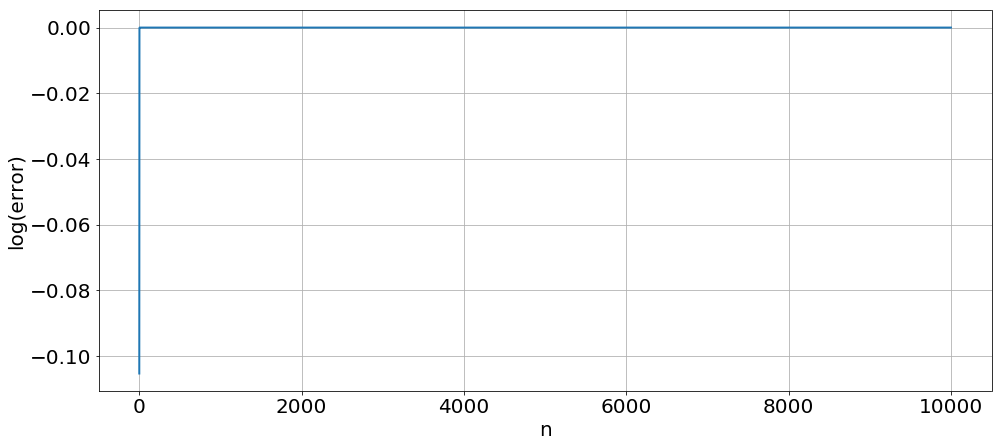

In [100]:
f = lambda x, p : np.cos(0.5 * np.pi * x) + 1
x0 = 0.1
n = 10000
x = banach_fp(f, x0, n, 0)
err = np.abs(1 - x)
plot_error(err)

<font color='blue'>
    
   Your comments here: 

</font>

The iteration does not seams to converge.

As you hopefully observed in the previous subproblem, not all fixed point iterations will converge. However, we can in some cases modify the fixed point iteration such that it converges. If we for example add some constant or variable to both sides, the solution does not change. Therefore, let $p$ be some parameter, and add $px$ to both sides of our system to obtain

$$ x + px = \cos(0.5\pi x) + 1 + px $$

Verify for yourselves that this can be rewritten into

$$ x = \frac{1}{1+p} \big( \cos(0.5\pi x) + 1 + px \big) =: g(x) $$

We will in the following assume $p\geq0$.

**b)** Modify your code to run the fixed point iteration to run $x_{n+1} = g(x_n)$. Test different values of $0\leq p\leq 2$. Which values of $p$ seem to give convergence?

*Hint*: If you followed the template above, you can reuse the banach_fp function and just change the function $f$.

-----------
p =  0
x* =  0.0


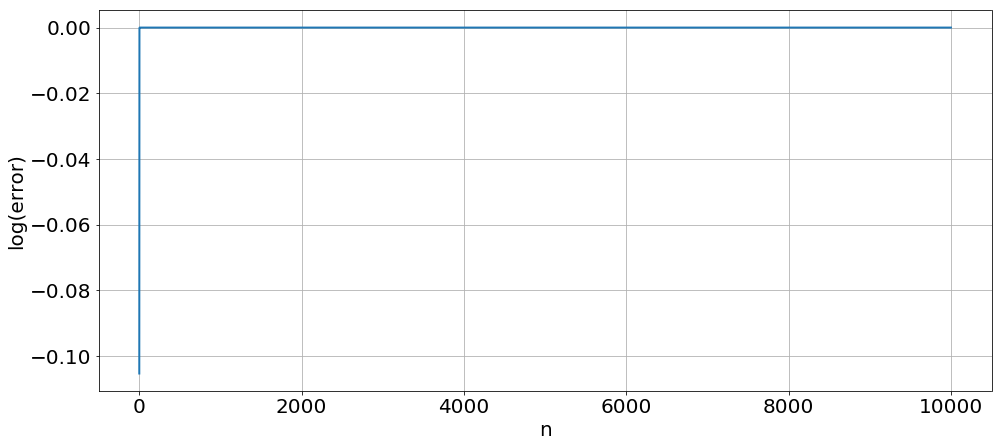

-----------
p =  0.28
x* =  0.870585626354076


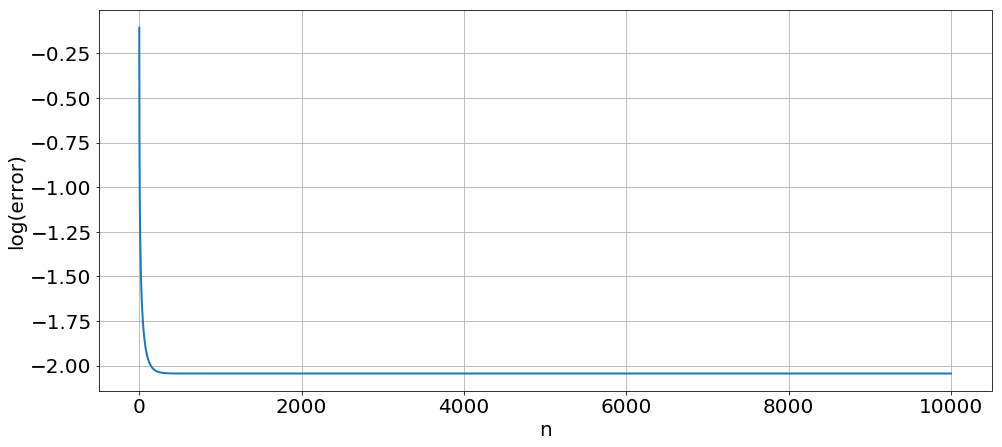

-----------
p =  0.29
x* =  0.9999999999999776


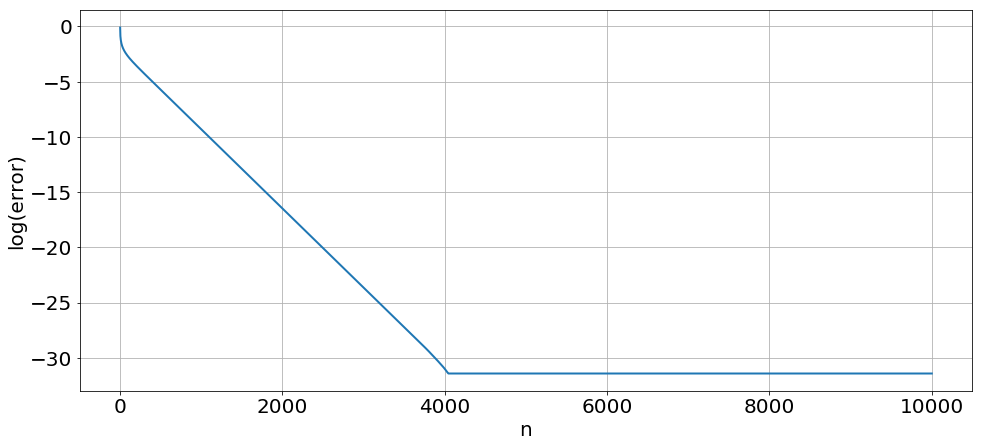

-----------
p =  0.41
x* =  0.9999999999999999


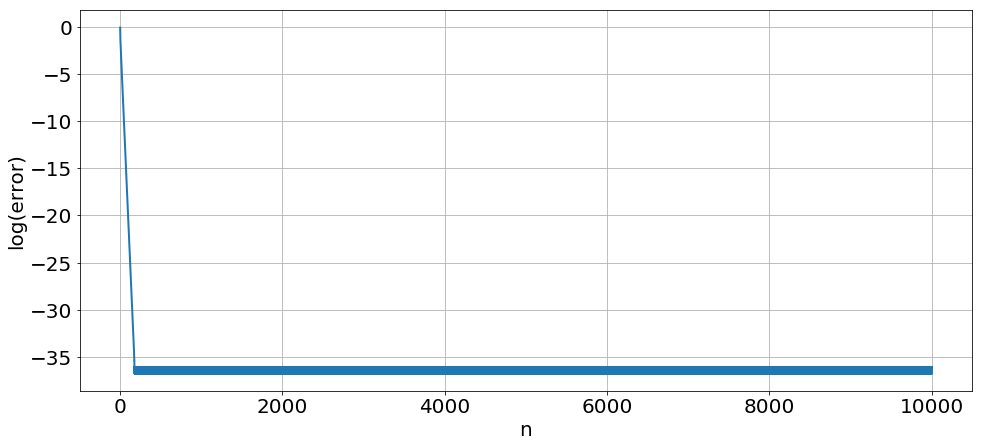

-----------
p =  0.6
x* =  0.9999999999999998


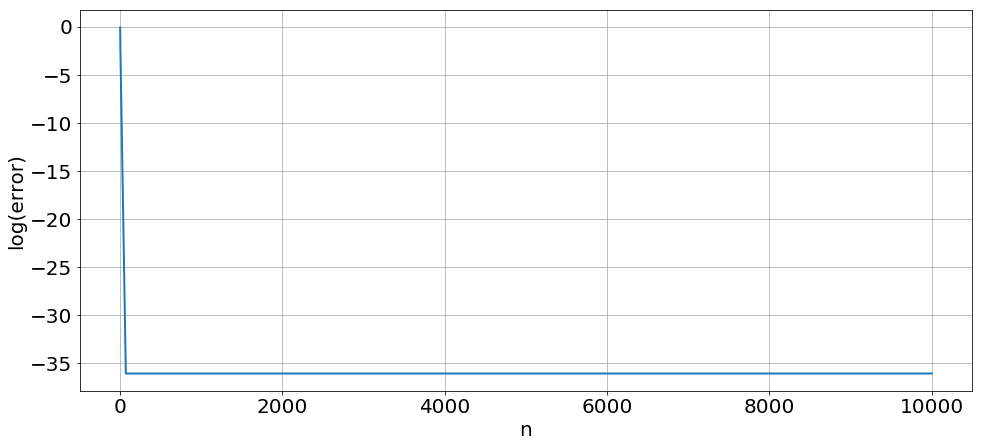

-----------
p =  1.0
x* =  1.0


C:\Users\olavm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


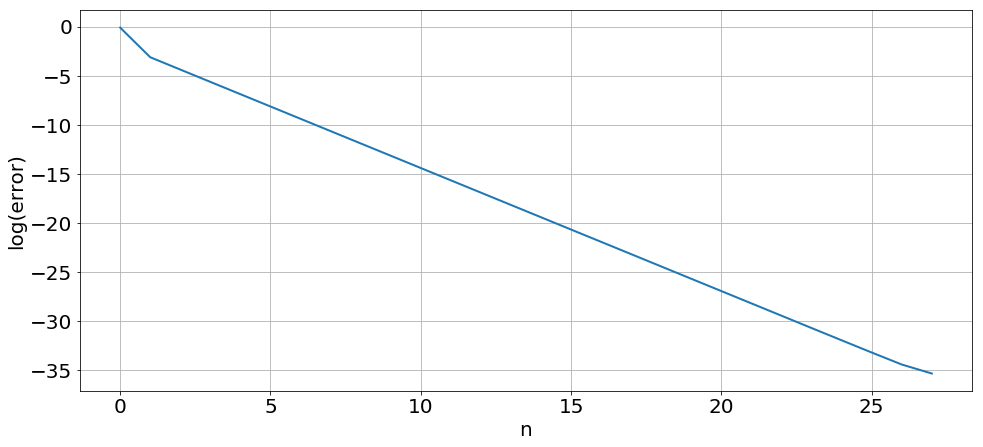

-----------
p =  1.2
x* =  1.0


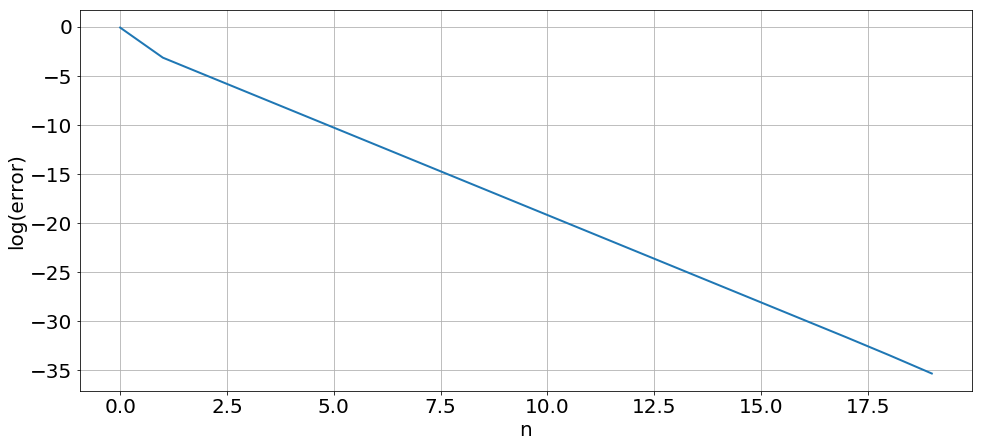

-----------
p =  1.4
x* =  1.0


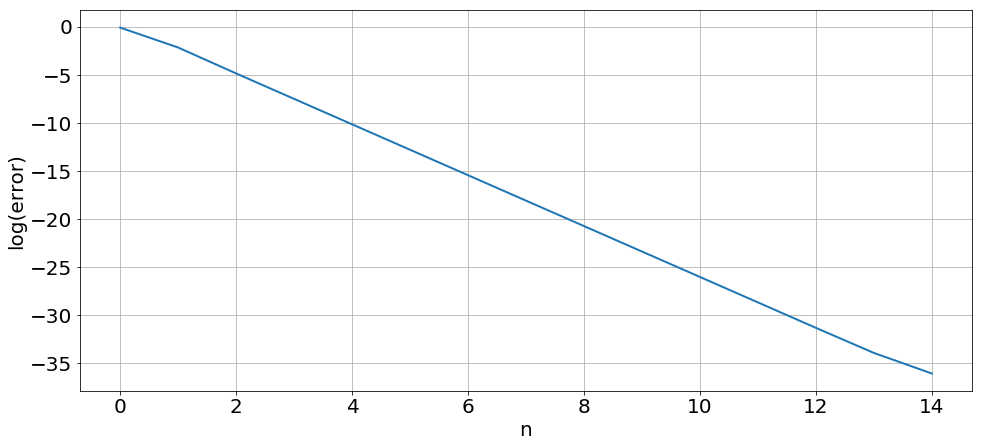

-----------
p =  1.6
x* =  1.0


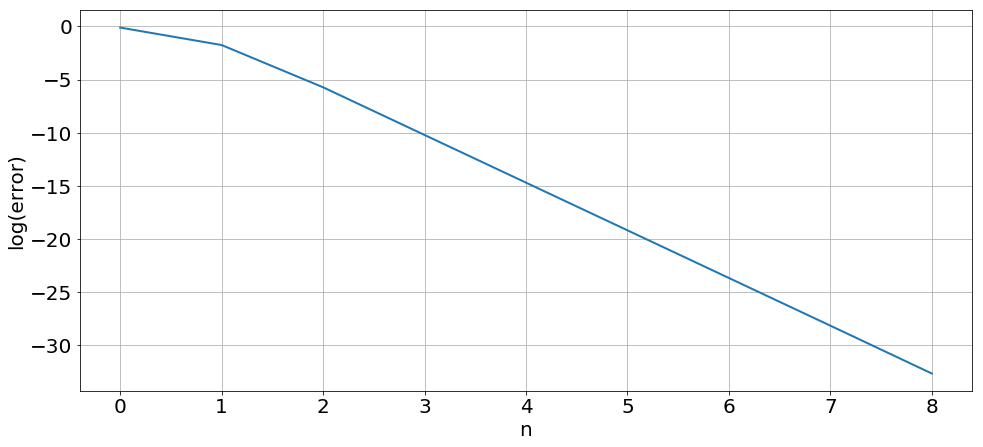

-----------
p =  1.8
x* =  1.0


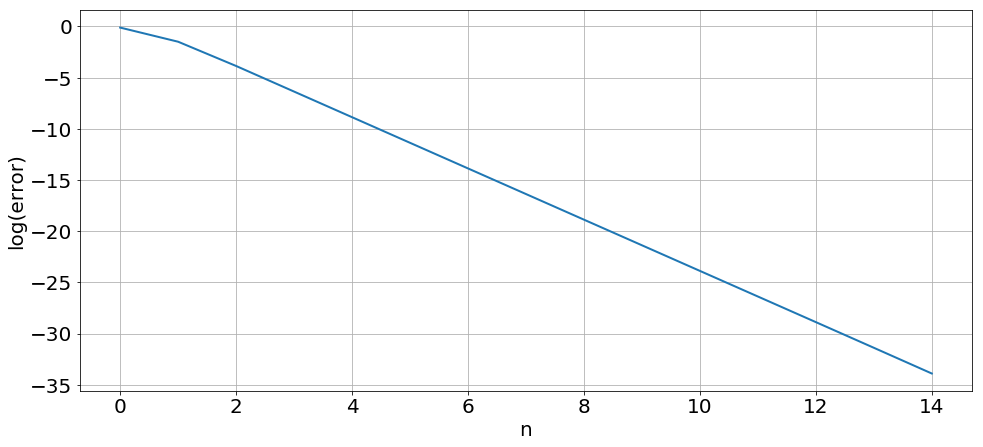

-----------
p =  2.0
x* =  1.0


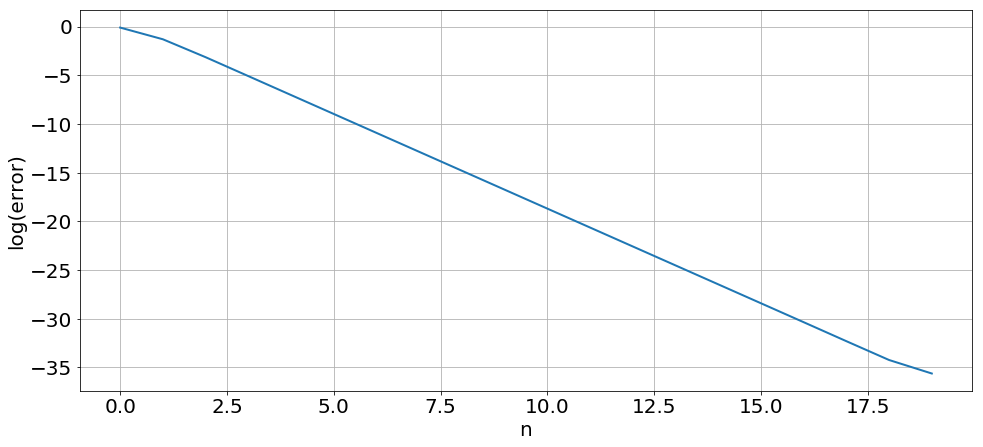

In [101]:
# your code here
g = lambda x, p : (np.cos(0.5 * np.pi * x) + 1 + p * x) / (1 + p)
x0 = 0.1
n = 10000
for p in [0, 0.28, 0.29, 0.41, 0.6, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]:
    print("-----------")
    print("p = ", p)
    x = banach_fp(g, x0, n, p)
    print("x* = ", x[-1])
    err = np.abs(1 - x)
    plot_error(err)
   

<font color='blue'>
    
   Your comments here: 

</font>

$p \in [0.29, 2]$ does converge, $p \in [0, 0.29)$ does not converge

**c)** Test $p=0.5,1,1.5$ and $2$ and make a convergence plot. Additionally, give a rough estimate of the convergence rate of the method.  

*Hint:* For fixed point iterations, the error is in general of the form $\|x_n-x^\ast\| = \mathcal O(q^n)$, where $q$ determines the order of convergence. Plot lines of the form $l(n) \propto q^n$ and experiment to find values of $q$ which corresponds to the convergence plots for the fixed point iterations.

In [102]:
# Find q
def get_q(err, p):
    if p == 0.5:
        n, m = 2, 19 
    elif p==1:
        n, m = 3, 25
    elif p==1.5:
        n, m = 2, 9
    elif p==2:
        n, m = 2, 10
    else:
        n, m = 1, 2
    q = (err[m] / err[n]) ** (1 / (m - n))
    print("q = ", q)

-----------
p =  0.5
x =  0.1
x* =  0.9999999999999999
q =  0.14789720220525354


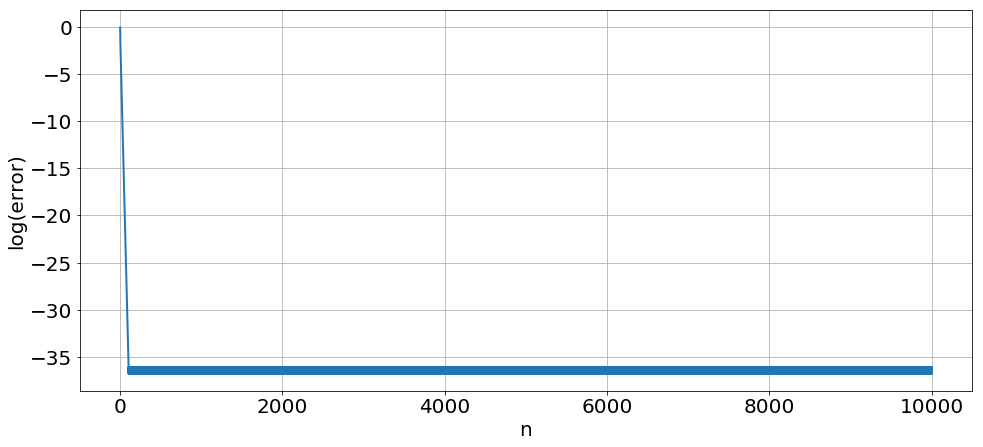

-----------
p =  1.0
x =  0.1
x* =  1.0
q =  0.7128228254550323


C:\Users\olavm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


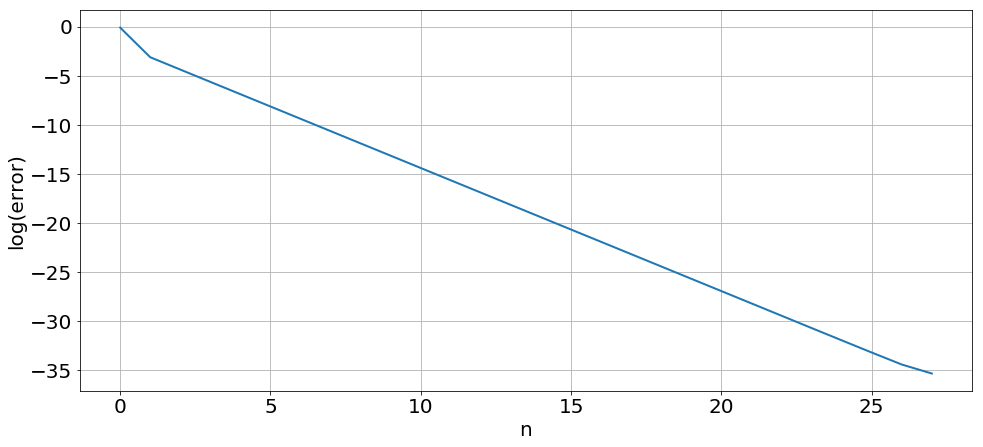

-----------
p =  1.5
x =  0.1
x* =  1.0
q =  0.28539033230138594


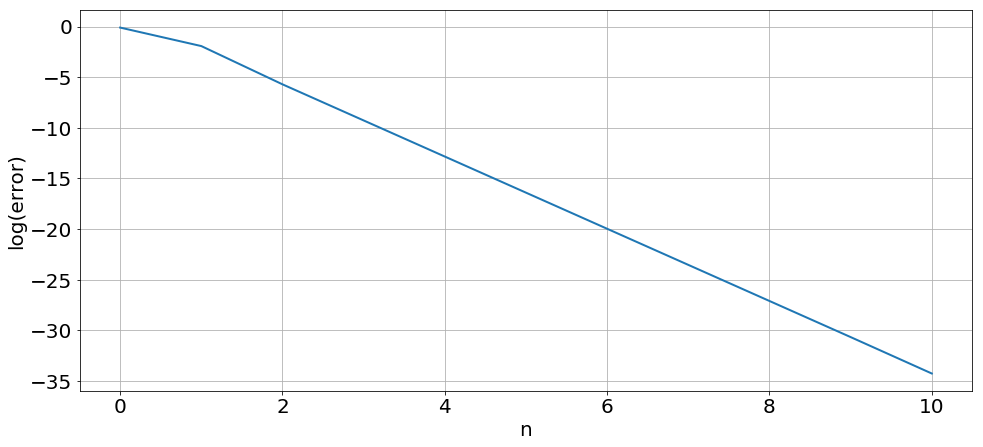

-----------
p =  2.0
x =  0.1
x* =  1.0
q =  0.028212287006520276


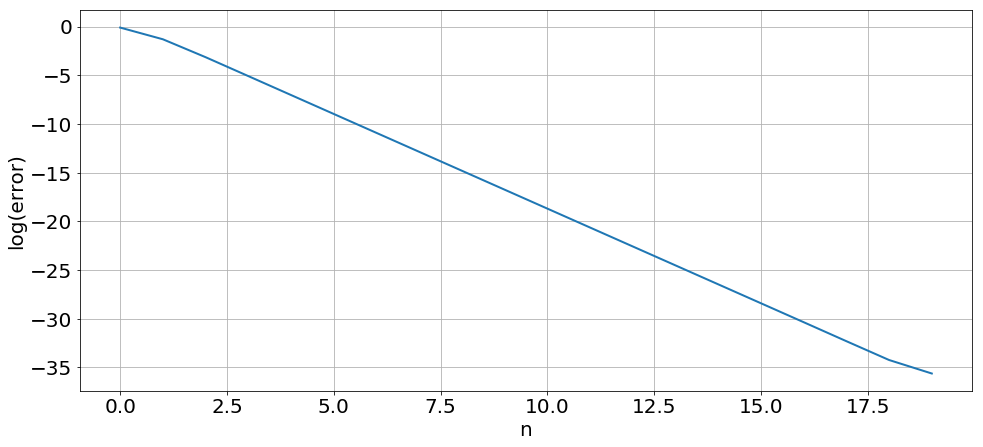

In [103]:
# your code here
x0 = 0.1
n = 10000
for p in np.array([0.5, 1, 1.5, 2], dtype=float):
    print("-----------")
    print("p = ", p)
    x = banach_fp(g, x0, n, p)
    print("x = ", x[0])
    print("x* = ", x[-1])
    get_q(err, p)
    err = np.abs(1 - x)
    plot_error(err)

<font color='blue'>
Fill in your observed convergence rates in the following table:
</font>

| $p$ | $q$  |
|:---:|:----:|
| 0.5 |   0.148   |
| 1.0 |   0.713  |
| 1.5 |   0.285 |
| 2.0 |    0.282  |

**d)** Show that the Lipschitz constant for $g$ with domain $[0,2]$ is given by 
$$ L = \frac{1}{1+p}\max\{p,0.5\pi-p\}. $$

*Hint:* Recall that for continuously differentiable, real-valued functions f, and compact domains $D$, the Lipschitz constant is given by
$$ L = \max_{x\in D} | f'(x) |. $$
You might also find the property $|x| = \max\{x,-x\}$ helpful in solving this problem.

<font color='blue'>
Solution:
</font>

$$L = \mathop {\max }\limits_{x \in \left[ {0,2} \right]} \left| {g'(x)} \right| = \mathop {\max }\limits_{x \in \left[ {0,2} \right]} \left| {\frac{{p - 0.5\pi \sin (0.5\pi x)}}{{p + 1}}} \right| = \frac{1}{{p + 1}}\mathop {\max }\limits_{x \in \left[ {0,2} \right]} \left| {p - 0.5\pi \sin (0.5\pi x)} \right|$$

This we can futher rewrithe to

$$\mathop {\max }\limits_{x \in \left[ {0,2} \right]} \left| {p - 0.5\pi \sin (0.5\pi x)} \right| = \mathop {\max }\limits_{x \in \left[ {0,2} \right]} \left\{ {\left. {\max \left\{ {\left. {p - 0.5\pi \sin (0.5\pi x), - \left( {p - 0.5\pi \sin (0.5\pi x)} \right)} \right\}} \right.} \right\}} \right. = \max \left\{ {\left. {\mathop {\max }\limits_{x \in \left[ {0,2} \right]} \left\{ {\left. {p - 0.5\pi \sin (0.5\pi x)} \right\}} \right.,\mathop {\max }\limits_{x \in \left[ {0,2} \right]} \left\{ {\left. {0.5\pi \sin (0.5\pi x) - p} \right\}} \right.} \right\}} \right.$$

and since

$$0 \le \sin (0.5\pi x) \le 1,x \in \left[ {0,2} \right]\\
\sin (0.5\pi  \cdot 0) = 0,\sin (0.5\pi  \cdot 1) = 1,\sin (0.5\pi  \cdot 2) = 0\\
\sin (0.5\pi x) = \sin (0.5\pi x + 2\pi k) = \sin (0.5\pi (x + 4k)),k \in \mathbb{Z} $$

we get that

$$\Rightarrow \mathop {\max }\limits_{x \in \left[ {0,2} \right]} \left\{ {\left. {p - 0.5\pi \sin (0.5\pi x)} \right\}} \right. = p,\mathop {\max }\limits_{x \in \left[ {0,2} \right]} \left\{ {\left. {0.5\pi \sin (0.5\pi x) - p} \right\}} \right. = 0.5\pi  - p$$
 
 this gives us
 
$$\Rightarrow L = \mathop {\max }\limits_{x \in \left[ {0,2} \right]} \left| {g'(x)} \right| = \frac{1}{{p + 1}}\max \left\{ {\left. {p,0.5\pi  - p} \right\}} \right..$$

The Banach fixed point theorem tells us that $\|x_{n+1} - x^\ast\| \leq L\|x_n - x^\ast\|$. In particular, this means that $\|x_n - x^\ast\| = \mathcal O(L^n)$. 

**e)** Compute $L$ and $g'(1)$ for $p = 0.5,1,1.5$ and $2$ and compare with the order of convergence you observed in problem **2c**. What do you observe?

In [110]:
def cumpute_L_and_g_x_1(p):
    g_x = lambda x, p : (p - 0.5 * np.pi * np.sin(0.5 * np.pi * x))/ (p + 1)                    
    L = 1 / (1 + p) * np.max([p, 0.5 * np.pi - p])
    g_x_1 = np.abs(g_x(1, p))
    print("---------")
    print("p = ", p)
    print("L = ", L)
    print("|g'(1)| = ", g_x_1)

In [111]:
for p in np.array([0.5, 1, 1.5, 2], dtype=float):
    cumpute_L_and_g_x_1(p)

---------
p =  0.5
L =  0.7138642178632644
|g'(1)| =  0.7138642178632644
---------
p =  1.0
L =  0.5
|g'(1)| =  0.2853981633974483
---------
p =  1.5
L =  0.6000000000000001
|g'(1)| =  0.028318530717958625
---------
p =  2.0
L =  0.6666666666666666
|g'(1)| =  0.14306789106836781


<font color='blue'>
    
Fill out the following table:
</font>

| $p$ | $L$  | $|g'(1)|$ | $q$  |
|:---:|:----:|:-------:|:----:|
| 0.5 |  0.714   |    0.714    |  0.148   |
| 1.0 |  0.500   |    0.285    |  0.713   |
| 1.5 |  0.600   |    0.028    |  0.285  |
| 2.0 |  0.667   |    0.143    |  0.282   |


Your comments here:

$L$ is the smallest and $q$ is the biggest, when $p=1.0$. This is where the fixed point itaration converges the fastest. (The error given avbove by Jupiter Nootebook is because we hit the root "to fast".) Also note that $L$ is big and $q$ small for $p=0.5$, where the fixed point itaration converges rally slow.